In [ ]:
# Author: Judy Zuo
# Date: 2020 03 04
# CS301-006, Professor Watson
# HW05 Solution
# data visulations and analysis
# link to the git repo :   https://github.com/judy756/HW-CS301
# link-to-the-relevant-git-commit 
#      
# name-of-the-branch : master


# HW 05

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 999)
import numpy as np

##Visualization Libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

### Problem 1

In [2]:
data_dir = 'C:\\Users\\judyz\\Downloads'
file = data_dir + '\\student_class.csv'
df = pd.read_csv(file)
df

,Unnamed: 0,Name,Midterm,Final,Attendance,HW,Final Average,Final Letter,Numeric Bin,Majors
0,0,Ariel,89,92,9,9,86.0,B+,80.0,BNFO
1,1,Brody,92,93,10,9,89.0,A,80.0,BNFO
2,2,Debra,76,88,8,6,74.0,C+,70.0,MATH
3,3,Rex,90,83,10,10,88.0,B+,80.0,MATH
4,4,Jerry,67,85,7,5,66.0,D,60.0,BNFO
...,...,...,...,...,...,...,...,...,...,...
145,145,Nicole,97,96,9,8,86.7,B+,80.0,MATH
146,146,Duncan,99,98,10,8,90.2,A,90.0,BNFO
147,147,Hope,96,92,10,9,89.8,A,80.0,IT
148,148,Kiara,93,91,10,10,90.9,A,90.0,CS


In [3]:
mid_med = df.groupby('Majors')['Midterm'].median().reset_index()
fin_med = df.groupby('Majors')['Final'].median().reset_index()
fin_avg_med = df.groupby('Majors')['Final Average'].median().reset_index()
med = mid_med.merge(fin_med, on='Majors', how='inner')
med = med.merge(fin_avg_med, on = 'Majors', how = 'inner')
med


,Majors,Midterm,Final,Final Average
0,BNFO,87.5,90.5,75.05
1,CS,82.0,74.5,72.70
2,IS,73.0,81.0,71.80
3,IT,82.5,80.5,74.80
4,MATH,84.5,80.5,74.30


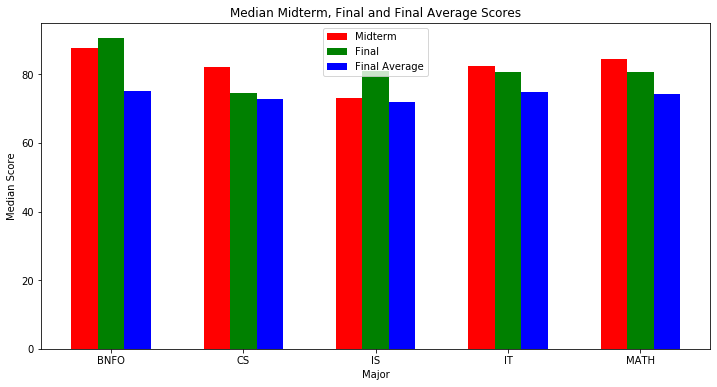

In [4]:
label_loc = np.arange(med.shape[0])
labs = ['BNFO','CS','IS','IT','MATH']
w = 0.2
plt.bar(label_loc - w, med['Midterm'], width=w, label='Midterm', color='red')
plt.bar(label_loc, med['Final'], width=w, label='Final', color='green')
plt.bar(label_loc + w, med['Final Average'], width=w, label='Final Average', color='blue')
plt.gcf().set_size_inches(12, 6)
plt.title('Median Midterm, Final and Final Average Scores')
plt.xlabel('Major')
plt.ylabel('Median Score')
plt.xticks(label_loc, labels=labs)
plt.legend()
plt.show()

Data Items: (x-axis) majors                                                              
Attributes: (y-axis) median midterm, final and final average scores ranging from [0, 100]                                       
Marks: bars                                                                  
Channels: vertical bars with different colors ti indicate different scores that are group by majors

BNFO major is doing well in Midterm and Final since the bars are higher than the rest. However, in Final Average, they all have about the same median scores. Overall, all majors seems to be doing about the same.

### Problem 2

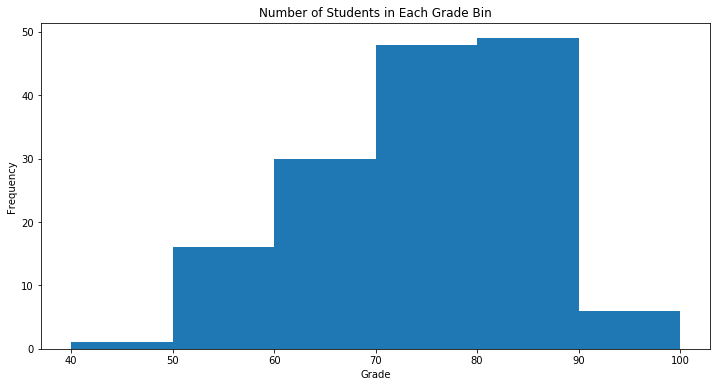

In [5]:
n_bins = [40, 50, 60, 70, 80, 90, 100]
plt.hist(df['Numeric Bin'], bins=n_bins)
plt.gcf().set_size_inches(12, 6)
plt.title('Number of Students in Each Grade Bin')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

Data Items: grades                                                            
Attributes: frequency of the grades                                             
Marks: bars                                                                    
Channels: vertical bars that are closely together or continuous 

The distribution is left skewed. 
I would also add in a best fit line to better show the distribution

### Problem 3

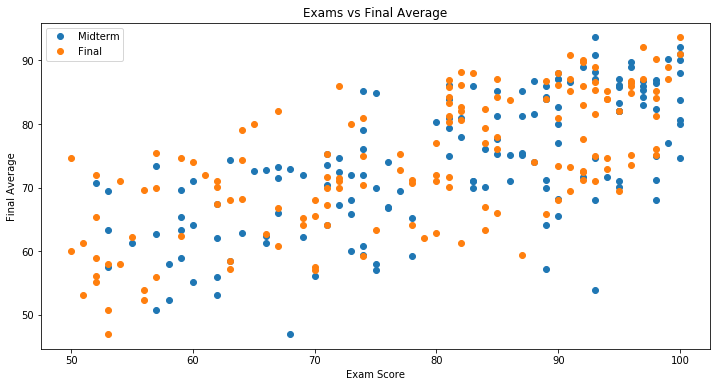

In [9]:
plt.plot(df['Midterm'], df['Final Average'], 'o', label='Midterm')
plt.plot(df['Final'], df['Final Average'], 'o', label='Final')
plt.gcf().set_size_inches(12, 6)
plt.ylabel('Final Average')
plt.xlabel('Exam Score')
plt.title('Exams vs Final Average')
plt.legend()
plt.show()

Data Items: scores (midterm and final)                                         
Attributes: corresponding final average ranging from [40, 100]                 
Marks: points or dots                                                          
Channels: different colors of dots to identify which exam

Yes, the graph does somehow indicate a pattern. The graph somewhat shows an increasing trend, meaning a higher exam score leads to a higher final average. However, the points are not closely gather so the slope of the trendline will be positive but the value or magnitude will be small.